In [115]:
'''
This notebook is oriented to use a given dataset customized to contains 6 features and training a classification tree
This features are: cqt, rmse, energy, mfccs, chromagram and spectral contrast
This notebook is currently in development phase, so contains a considerably quantity of test code

'''

'\nThis notebook is oriented to use a given dataset customized to contains 6 features and training a classification tree\nThis features are: cqt, rmse, energy, mfccs, chromagram and spectral contrast\nThis notebook is currently in development phase, so contains a considerably quantity of test code\n\n'

In [23]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc

# Reading Audio Data

# features = pd.read_csv('Datasets/2000Spoti.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('Dataframes/var_mean_dict.csv', encoding='latin-1', thousands=',')
# features = pd.read_csv('Dataframes/sliceDataframe/var_mean_dict_10000_Samples.csv', encoding='latin-1', thousands=',')
features = pd.read_csv('Dataframes/ismir04/ismir04_3_sec.csv', encoding='latin-1', thousands=',')
# features = pd.read_csv('Dataframes/ismir04/ismir04_10_sec.csv', encoding='latin-1', thousands=',')
# features = pd.read_csv('Dataframes/ismir04/ismir04_100_sec.csv', encoding='latin-1', thousands=',')

print(features.head(5))

print('done')

# ISMIR LABELS DROPING
features = features.drop(features[features.Genre == 'Electronic'].index)
features = features.drop(features[features.Genre == 'Punk'].index)
features = features.drop(features[features.Genre == 'World'].index)


#extracting labels and features

labelColumn = 'Genre'

labels = np.array(features[labelColumn])
print(np.unique(labels))

print("The labels of out dataset are:", np.unique(labels))
print("And their shape is:", labels.shape)


# Only MFCC
            
# featureColumsToDrop = ['Unnamed: 0', 'STFT_Mean.1', 'STFT_Var.1', 'Genre', 'Energy_Mean', 'RMSE_Mean', 'ZCR_Mean', 'CQT_Mean', 
#                            'Spectral_Contrast_Mean', 'Chromagram_Mean', 'Tempo_Mean', 'STFT_Mean', 
#                           'Autocorrelation_Mean', 'STFT_Mean', 'Spectral_Centroid_Mean', 'Rolloff_Mean',
#                           'Energy_Var', 'RMSE_Var', 'ZCR_Var', 'CQT_Var', 'Spectral_Contrast_Var', 'Chromagram_Var', 'Tempo_Var', 'STFT_Var',
#                           'Autocorrelation_Var', 'STFT_Var', 'Spectral_Centroid_Var', 'Rolloff_Var']

# ALL

featureColumsToDrop = ['Unnamed: 0', 'STFT_Mean.1', 'STFT_Var.1', 'Genre']

# Feture importance ordered

# featureColumsToDrop = ['Unnamed: 0', 'STFT_Mean.1', 'STFT_Var.1', 'Genre',
#                         'Energy_Mean', 'RMSE_Mean', 'ZCR_Mean', 'CQT_Mean', 'Tempo_Mean',
#                         'ZCR_Var', 'Spectral_Contrast_Var','Tempo_Var', 'STFT_Var',
#                         'MFCCS0','MFCCS1','MFCCS2','MFCCS3','MFCCS4','MFCCS5','MFCCS6','MFCCS7',
#                         'MFCCS8','MFCCS9','MFCCS10', 'CQT_Mean','MFCCS11','MFCCS12']

# NO MFCCS

# featureColumsToDrop = ['Unnamed: 0', 'STFT_Mean.1', 'STFT_Var.1', 'Genre','MFCCS0','MFCCS1','MFCCS2','MFCCS3','MFCCS4','MFCCS5','MFCCS6','MFCCS7','MFCCS8','MFCCS9','MFCCS10', 'MFCCS11','MFCCS12']

# TESTING ISMIR

# featureColumsToDrop = ['Unnamed: 0', 'STFT_Mean.1', 'STFT_Var.1', 'Genre', 'Energy_Mean', 'RMSE_Mean', 'ZCR_Mean', 'CQT_Mean', 
#                            'Spectral_Contrast_Mean', 'Chromagram_Mean', 'Tempo_Mean', 'STFT_Mean', 
#                           'Autocorrelation_Mean', 'STFT_Mean', 'Spectral_Centroid_Mean', 'Rolloff_Mean',
#                           'Energy_Var', 'RMSE_Var', 'ZCR_Var', 'Spectral_Contrast_Var', 'Tempo_Var', 'STFT_Var',
#                           'Autocorrelation_Var', 'STFT_Var', 'Spectral_Centroid_Var', 'Rolloff_Var',
#                        'MFCCS0','MFCCS1','MFCCS2','MFCCS3','MFCCS4','MFCCS5','MFCCS6','MFCCS7','MFCCS8','MFCCS9','MFCCS10', 'MFCCS11','MFCCS12']

features = features.drop(featureColumsToDrop, 1)

feature_names = list(features.columns)

print(feature_names)

# features_names = features


print("The features of out dataset are:")

features.head(5)

   Unnamed: 0      Genre  Energy_Mean  RMSE_Mean  ZCR_Mean  CQT_Mean  \
0           0  Classical    23.580312   0.104608      6290  0.003783   
1           1  Classical    22.783813   0.095552      5561  0.001213   
2           2  Classical    12.614111   0.073688      5977  0.006864   
3           3  Classical     2.731562   0.028473      2056  0.003114   
4           4  Classical     0.805514   0.009467      4399  0.000545   

   Spectral_Contrast_Mean  Chromagram_Mean  Tempo_Mean  STFT_Mean  ...  \
0               22.705221         0.219784  151.999081   0.000028  ...   
1               24.114206         0.212713  129.199219   0.000010  ...   
2               23.677038         0.227062  117.453835   0.000023  ...   
3               22.487414         0.231390   67.999589   0.000001  ...   
4               20.573049         0.253870  135.999178   0.000001  ...   

   MFCCS3  MFCCS4  MFCCS5  MFCCS6  MFCCS7  MFCCS8  MFCCS9  MFCCS10  MFCCS11  \
0      65      36      29      24      24  

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Energy_Mean,RMSE_Mean,ZCR_Mean,CQT_Mean,Spectral_Contrast_Mean,Chromagram_Mean,Tempo_Mean,STFT_Mean,Autocorrelation_Mean,Spectral_Centroid_Mean,...,MFCCS3,MFCCS4,MFCCS5,MFCCS6,MFCCS7,MFCCS8,MFCCS9,MFCCS10,MFCCS11,MFCCS12
0,23.580312,0.104608,6290,0.003783,22.705221,0.219784,151.999081,0.000028,13.107112,1611.285209,...,65,36,29,24,24,24,29,27,28,15
1,22.783813,0.095552,5561,0.001213,24.114206,0.212713,129.199219,0.000010,14.567659,1328.455158,...,26,44,34,38,21,33,23,19,24,34
2,12.614111,0.073688,5977,0.006864,23.677038,0.227062,117.453835,0.000023,0.977451,1658.828601,...,25,43,26,21,34,27,21,21,31,34
3,2.731562,0.028473,2056,0.003114,22.487414,0.231390,67.999589,0.000001,4.200762,941.615108,...,37,13,32,37,20,17,21,22,17,12
4,0.805514,0.009467,4399,0.000545,20.573049,0.253870,135.999178,0.000001,1.479604,1962.993919,...,65,15,22,12,13,30,32,12,10,14


In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import joblib

def train_clasify():
    """
    Method that train a RF Classifier and return a metrics report with
        - Recall by label
        - Precision by label
        - F1-score by label
        - Avg weighted recall
        - Avg weighted precision
        - Avg weighted f1-score
        - Avg macro recall
        - Avg macro recall
        - Avg macro recall
        - Avg total accuracy
    """

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1)

    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)

    scaler = StandardScaler()
    scaler.fit(train_features)
    train_features_scaled = scaler.transform(train_features)
    test_features_scaled =  scaler.transform(test_features)
    
    # Instantiate model with 1000 decision trees
    rf = RandomForestClassifier(n_estimators = 100)
    
    scores = cross_val_score(rf, train_features_scaled, train_labels, cv=3)
    
    # Train the model on training data
    rf.fit(train_features_scaled, train_labels)
    
    # Export as dot file
    
#     from sklearn.tree import plot_tree
#     fig = pyplot.gcf()
#     fig.set_size_inches(800, 400)
#     plot_tree(rf.estimators_[0], 
#           feature_names=feature_names,
#           class_names=labels, 
#           filled=True, impurity=True, 
#           rounded=True)
#     fig.savefig('figure_name.pdf')
    
    print("-------------------------------------------")
    print("Metrics info section")
    print("-------------------------------------------")
    
    print("Scores by fold")
    print(scores)
    
    importancia_predictores = pd.DataFrame({
        'feature':
        features.columns,
        'importance':
        rf.feature_importances_
    })
    print("Feature importance in the model")
    print("-------------------------------------------")
    print(importancia_predictores.sort_values('importance', ascending=False))

    predictions = rf.predict(test_features_scaled)
    print(predictions)

    report = classification_report(test_labels, predictions, np.unique(labels))
    
    # Exporting model     
    joblib.dump(rf, "models/gtzan_train/100.joblib")
    
    return report, rf

# report, rf = train_clasify()
# print(report)
rf = joblib.load("models/gtzan_train/100.joblib")
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)
predictions = rf.predict(features_scaled)
report = classification_report(labels, predictions, np.unique(labels))
print(report)

              precision    recall  f1-score   support

   Classical       0.00      0.00      0.00       319
        Jazz       0.03      0.08      0.04        26
       Metal       0.33      0.24      0.28        29
         Pop       0.00      0.00      0.00         5
        Rock       0.05      0.02      0.03        96

   micro avg       0.07      0.02      0.03       475
   macro avg       0.08      0.07      0.07       475
weighted avg       0.03      0.02      0.03       475



C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Classical' 'Jazz' 'Metal' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alvar\anaconda3\envs\tfg\lib\si

['models/random_forest.joblib']

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, test_features, test_labels)
fig = plt.gcf()
fig.set_size_inches(28.5, 28.5)
plt.show()

import junix;
junix.export_images(filepath= "ClassificationTree.ipynb")

NameError: name 'test_features' is not defined

In [48]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Conv1D


def train_ann_model(inputs, targets):
    model = keras.models.Sequential()
    
#     , kernel_regularizer = keras.regularizers.l2(0.001)
    
#     model.add(keras.layers.Dropout(0.3, noise_shape = None, seed = None))
    model.add(keras.layers.Dense(512, activation='relu', input_shape=((inputs.shape[1],))))
    model.add(keras.layers.Dropout(0.3, noise_shape = None, seed = None))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.3, noise_shape = None, seed = None))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.3, noise_shape = None, seed = None))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # train
    model_history = model.fit(inputs, targets,
                                epochs=64,
                                batch_size=100,
#                                     validation_split=0.2,
#                                     validation_data=(test_features, test_labels),
                                verbose=False)
    
    #  "Accuracy"
    plt.plot(model_history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    
    model.summary()
    
    return model, model_history

def train_clasify_KFold():
    """
    Method that train a RF Classifier and return a metrics report with
        - Recall by label
        - zºPrecision by label
        - F1-score by label
        - Avg weighted recall
        - Avg weighted precision
        - Avg weighted f1-score
        - Avg macro recall
        - Avg macro recall
        - Avg macro recall
        - Avg total accuracy
    """
    # Encode 
    
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    labels_encoded = label_encoder.transform(labels)

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels_encoded, test_size = 0.25)

    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    
    scaler = StandardScaler()
    scaler.fit(train_features)
    train_features_scaled = scaler.transform(train_features)
    test_features_scaled =  scaler.transform(test_features)
    
    # Merge inputs and targets
    inputs = np.concatenate((train_features_scaled, test_features_scaled), axis=0)
    targets = np.concatenate((train_labels, test_labels), axis=0)
    
    # Define the K-fold Cross Validator
    kfold = KFold(n_splits=3, shuffle=True)

    # K-fold Cross Validation model evaluation
    fold_no = 1
    
    print(kfold)
    
    for train, test in kfold.split(inputs, targets):
        print(train.shape)
        model, history = train_ann_model(inputs[train], targets[train])
        scores = model.evaluate(inputs[test], targets[test], verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
#         acc_per_fold.append(scores[1] * 100)
#         loss_per_fold.append(scores[0])
        
        labels_probabilities = model.predict(inputs[test])
        predictions = labels_probabilities.argmax(axis=-1)
        print('PREDICTIONS', predictions)
        report = classification_report(label_encoder.inverse_transform(targets[test]), 
                                   label_encoder.inverse_transform(predictions), 
                                   label_encoder.inverse_transform(np.unique(labels_encoded)))
        print(report)
        # Increase fold number
        fold_no = fold_no + 1
    return report

def train_clasify():
# Encode 
    
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    labels_encoded = label_encoder.transform(labels)

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels_encoded, test_size = 0.25)

    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    
    scaler = StandardScaler()
    scaler.fit(train_features)
    train_features_scaled = scaler.transform(train_features)
    test_features_scaled =  scaler.transform(test_features)
    
    # Merge inputs and targets
    inputs = np.concatenate((train_features_scaled, test_features_scaled), axis=0)
    targets = np.concatenate((train_labels, test_labels), axis=0)

    model, history = train_ann_model(train_features_scaled, train_labels)
    scores = model.evaluate(test_features_scaled, test_labels, verbose=0)

    labels_probabilities = model.predict(test_features_scaled)
    predictions = labels_probabilities.argmax(axis=-1)
    print('PREDICTIONS', predictions)
    report = classification_report(label_encoder.inverse_transform(test_labels), 
                               label_encoder.inverse_transform(predictions), 
                               label_encoder.inverse_transform(np.unique(labels_encoded)))

    return report, model
    
    
# train_clasify_KFold()
# report, ann_model = train_clasify()
# print(report)

label_encoder = LabelEncoder()
label_encoder.fit(labels)
labels_encoded = label_encoder.transform(labels)

scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

labels_probabilities = ann_model.predict(features_scaled)
predictions = labels_probabilities.argmax(axis=-1)
print('PREDICTIONS', predictions)
report = classification_report(label_encoder.inverse_transform(labels), 
                               label_encoder.inverse_transform(predictions), 
                               label_encoder.inverse_transform(np.unique(labels_encoded)))
# ann_model.history

# plt.plot(ann_model.history['accuracy'])

# matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


PREDICTIONS [3 1 1 5 6 5 5 1 5 1 1 5 1 0 1 5 5 5 5 5 5 5 1 0 1 5 1 5 4 5 9 5 5 9 9 0 5
 9 2 5 2 9 2 1 5 0 2 0 5 2 5 2 1 1 4 2 1 5 9 7 1 1 8 8 5 0 6 2 1 9 4 1 4 1
 1 1 5 1 2 2 0 5 5 3 2 5 2 2 2 6 3 0 0 0 9 5 0 0 1 1 6 9 0 5 5 8 4 0 6 1 9
 0 2 2 5 3 4 4 1 1 1 1 1 1 2 1 9 1 8 9 5 1 5 2 2 0 5 2 2 2 5 5 9 0 5 6 0 0
 9 6 9 9 9 9 1 1 1 5 4 1 9 3 5 3 2 5 3 9 0 3 3 3 6 6 3 5 5 0 3 2 1 5 0 2 7
 2 1 8 2 0 2 0 1 0 6 5 3 4 1 5 1 4 5 1 6 5 2 2 2 4 1 8 2 4 8 5 5 3 5 5 0 0
 5 2 4 1 5 1 5 5 5 1 5 5 5 6 8 5 5 5 5 5 5 5 5 2 0 9 0 8 0 2 2 2 0 8 9 8 8
 8 8 8 9 9 2 9 0 0 5 4 4 0 1 1 4 2 1 1 1 0 4 0 0 0 3 1 1 0 1 1 3 1 0 2 3 0
 2 6 3 2 2 3 5 5 0 1 1 1 1 2 5 5 0 1 2 0 2 0 5 4 4 5 8 4 4 4 4 4 4 4 4 9 5
 4 4 4 5 4 0 4 5 4 7 4 3 6 4 0 4 4 3 1 4 5 4 5 4 8 5 6 2 8 4 2 2 2 6 5 0 4
 5 5 4 6 4 4 4 8 3 9 4 0 1 4 6 6 7 0 0 0 4 6 0 4 3 4 7 0 8 7 0 4 4 2 3 1 4
 6 5 7 4 4 8 0 4 1 6 9 7 5 7 4 4 4 7 5 4 4 9 4 4 6 4 9 2 5 2 2 2 5 9 5 5 0
 5 8 8 2 9 5 5 5 3 0 0 8 3 2 3 3 1 1 9 6 7 3 3 7 3 3 7 3 1 4 6 9 8 6 9 2 3
 3 4 9 4 0 7 

ValueError: y contains previously unseen labels: ['Classical' 'Electronic' 'Jazz' 'Metal' 'Pop' 'Punk' 'Rock' 'World']

Training Features Shape: (7500, 35)
Training Labels Shape: (7500,)
Testing Features Shape: (2500, 35)
Testing Labels Shape: (2500,)


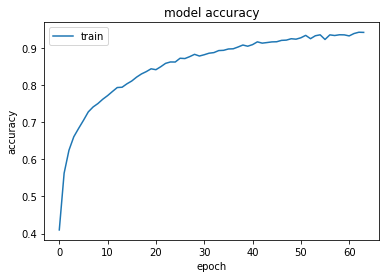

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               18432     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


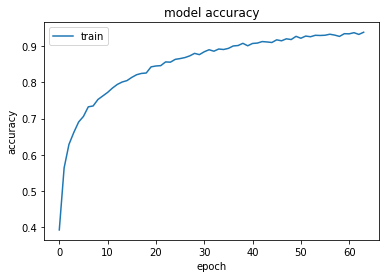

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               18432     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


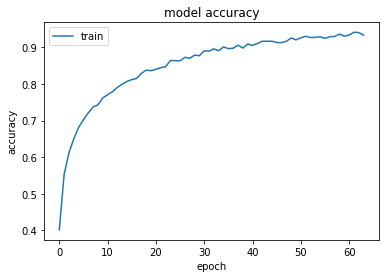

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               18432     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


              precision    recall  f1-score   support

       Blues       0.89      0.88      0.88       249
   Classical       0.89      0.95      0.92       238
     Country       0.85      0.80      0.82       262
       Disco       0.90      0.81      0.86       245
      Hiphop       0.90      0.91      0.90       253
        Jazz       0.86      0.89      0.87       239
       Metal       0.94      0.94      0.94       261
         Pop       0.88      0.86      0.87       257
      Reggae       0.86      0.89      0.88       244
        Rock       0.77      0.80      0.78       252

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500

Training Features Shape: (7500, 35)
Training Labels Shape: (7500,)
Testing Features Shape: (2500, 35)
Testing Labels Shape: (2500,)


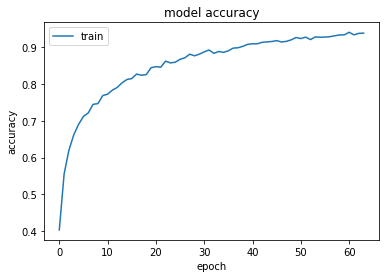

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               18432     
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


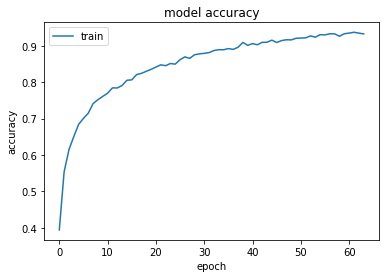

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               18432     
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


              precision    recall  f1-score   support

       Blues       0.89      0.93      0.91       243
   Classical       0.95      0.97      0.96       258
     Country       0.83      0.85      0.84       231
       Disco       0.87      0.89      0.88       248
      Hiphop       0.92      0.89      0.90       245
        Jazz       0.90      0.92      0.91       273
       Metal       0.93      0.96      0.95       255
         Pop       0.93      0.85      0.89       234
      Reggae       0.88      0.94      0.91       248
        Rock       0.85      0.75      0.80       265

    accuracy                           0.90      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.90      0.90      0.89      2500

Training Features Shape: (7500, 35)
Training Labels Shape: (7500,)
Testing Features Shape: (2500, 35)
Testing Labels Shape: (2500,)


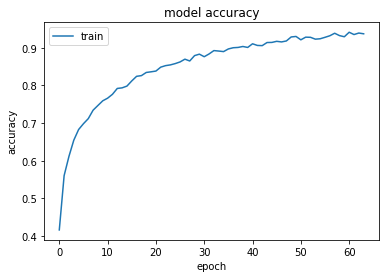

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               18432     
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


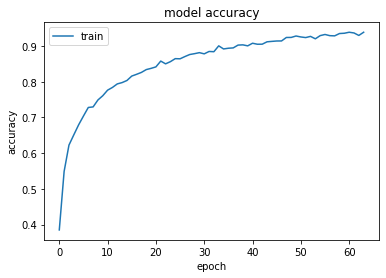

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               18432     
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


              precision    recall  f1-score   support

       Blues       0.88      0.90      0.89       258
   Classical       0.96      0.96      0.96       267
     Country       0.86      0.83      0.85       260
       Disco       0.89      0.87      0.88       253
      Hiphop       0.89      0.91      0.90       233
        Jazz       0.86      0.93      0.90       261
       Metal       0.92      0.95      0.93       241
         Pop       0.92      0.87      0.90       261
      Reggae       0.89      0.89      0.89       235
        Rock       0.85      0.83      0.84       231

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500

Training Features Shape: (7500, 35)
Training Labels Shape: (7500,)
Testing Features Shape: (2500, 35)
Testing Labels Shape: (2500,)


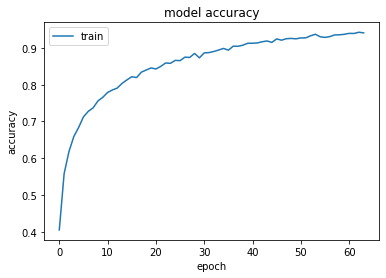

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               18432     
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


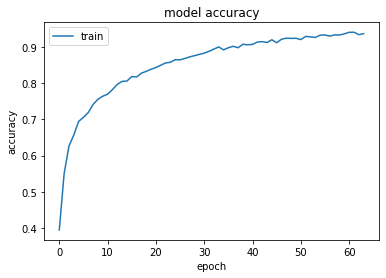

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               18432     
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


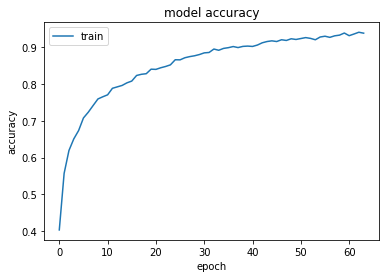

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               18432     
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [6]:
"""
This code was develop in order to implement corss validation obtaining more metrics that in sklearn version
"""

def get_metrics(report, tag, start_point):
    """
    Method that extract metrics from the string table returned by the classification_report method from sklearn package
    """
    avg_precision = report[report.index(tag)+start_point:report.index(tag)+start_point+4]
    avg_recall = report[report.index(tag)+start_point+10:report.index(tag)+start_point+10+4]
    avg_f1_score = report[report.index(tag)+start_point+20:report.index(tag)+start_point+20+4]
    return avg_precision, avg_recall, avg_f1_score

def get_metrics_avg(number_iterations):
    """
    Method that make number_iterations training a RF classifier and return 2 dictionaires with metics
    
        - One with metrics by genre label
        - The other with total metrics of all the genre labels
    """
    
    # Initializing the by genre and total metrics arrays necessaries to catch the data
    
    blues_precision_array = np.arange(number_iterations).astype(np.float32)
    blues_recall_array = np.arange(number_iterations).astype(np.float32)
    blues_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    classical_precision_array = np.arange(number_iterations).astype(np.float32)
    classical_recall_array = np.arange(number_iterations).astype(np.float32)
    classical_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    country_precision_array = np.arange(number_iterations).astype(np.float32)
    country_recall_array = np.arange(number_iterations).astype(np.float32)
    country_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    disco_precision_array = np.arange(number_iterations).astype(np.float32)
    disco_recall_array = np.arange(number_iterations).astype(np.float32)
    disco_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    hiphop_precision_array = np.arange(number_iterations).astype(np.float32)
    hiphop_recall_array = np.arange(number_iterations).astype(np.float32)
    hiphop_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    jazz_precision_array = np.arange(number_iterations).astype(np.float32)
    jazz_recall_array = np.arange(number_iterations).astype(np.float32)
    jazz_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    metal_precision_array = np.arange(number_iterations).astype(np.float32)
    metal_recall_array = np.arange(number_iterations).astype(np.float32)
    metal_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    pop_precision_array = np.arange(number_iterations).astype(np.float32)
    pop_recall_array = np.arange(number_iterations).astype(np.float32)
    pop_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    reggae_precision_array = np.arange(number_iterations).astype(np.float32)
    reggae_recall_array = np.arange(number_iterations).astype(np.float32)
    reggae_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    rock_precision_array = np.arange(number_iterations).astype(np.float32)
    rock_recall_array = np.arange(number_iterations).astype(np.float32)
    rock_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    macro_avg_precision_array = np.arange(number_iterations).astype(np.float32)
    macro_avg_recall_array = np.arange(number_iterations).astype(np.float32)
    macro_avg_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    weighted_avg_precision_array = np.arange(number_iterations).astype(np.float32)
    weighted_avg_recall_array = np.arange(number_iterations).astype(np.float32)
    weighted_avg_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    accuracy_avg_array = np.arange(number_iterations).astype(np.float32)
    
    labels = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock']
    
    # Loop with the training RF classiffier itrerations. We fill the arrays metrics in each iteration     
    
    for i in range(0, number_iterations):
        report = train_clasify()
        
        print(report)
        
        # Metrics by Genre
        (precision, recall, f1_score) = get_metrics(report, "Blues", 12)
        blues_precision_array[i] = precision
        blues_recall_array[i] = recall
        blues_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "Classical", 16)
        classical_precision_array[i] = precision
        classical_recall_array[i] = recall
        classical_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "Country", 14)
        country_precision_array[i] = precision
        country_recall_array[i] = recall
        country_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "Disco", 12)
        disco_precision_array[i] = precision
        disco_recall_array[i] = recall
        disco_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "Hiphop", 13)
        hiphop_precision_array[i] = precision
        hiphop_recall_array[i] = recall
        hiphop_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "Jazz", 11)
        jazz_precision_array[i] = precision
        jazz_recall_array[i] = recall
        jazz_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "Metal", 12)
        metal_precision_array[i] = precision
        metal_recall_array[i] = recall
        metal_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "Pop", 10)
        pop_precision_array[i] = precision
        pop_recall_array[i] = recall
        pop_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "Reggae", 13)
        reggae_precision_array[i] = precision
        reggae_recall_array[i] = recall
        reggae_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "Rock", 11)
        rock_precision_array[i] = precision
        rock_recall_array[i] = recall
        rock_f1_score_array[i] = f1_score
        
        # General metrics         
        
        (precision, recall, f1_score) = get_metrics(report, "accuracy", 15)
        accuracy_avg_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "weighted", 19)
        weighted_avg_precision_array[i] = precision
        weighted_avg_recall_array[i] = recall
        weighted_avg_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "macro avg", 16)
        macro_avg_precision_array[i] = precision
        macro_avg_recall_array[i] = recall
        macro_avg_f1_score_array[i] = f1_score
        
    # Now we fill the arrays that we are going to use to create the final dictionaries     
    
    precision_array = []
    recall_array = []
    f1_score_array = []
    
    precision_array.append(blues_precision_array.mean())
    recall_array.append(blues_recall_array.mean())
    f1_score_array.append(blues_f1_score_array.mean())
    
    precision_array.append(classical_precision_array.mean())
    recall_array.append(classical_recall_array.mean())
    f1_score_array.append(classical_f1_score_array.mean())
    
    precision_array.append(country_precision_array.mean())
    recall_array.append(country_recall_array.mean())
    f1_score_array.append(country_f1_score_array.mean())
    
    precision_array.append(disco_precision_array.mean())
    recall_array.append(disco_recall_array.mean())
    f1_score_array.append(disco_f1_score_array.mean())
    
    precision_array.append(hiphop_precision_array.mean())
    recall_array.append(hiphop_recall_array.mean())
    f1_score_array.append(hiphop_f1_score_array.mean())
    
    precision_array.append(jazz_precision_array.mean())
    recall_array.append(jazz_recall_array.mean())
    f1_score_array.append(jazz_f1_score_array.mean())
    
    precision_array.append(metal_precision_array.mean())
    recall_array.append(metal_recall_array.mean())
    f1_score_array.append(metal_f1_score_array.mean())
    
    precision_array.append(pop_precision_array.mean())
    recall_array.append(pop_recall_array.mean())
    f1_score_array.append(pop_f1_score_array.mean())
    
    precision_array.append(reggae_precision_array.mean())
    recall_array.append(reggae_recall_array.mean())
    f1_score_array.append(reggae_f1_score_array.mean())
    
    precision_array.append(rock_precision_array.mean())
    recall_array.append(rock_recall_array.mean())
    f1_score_array.append(rock_f1_score_array.mean())
    
    # Dictionaries creation     
    
    by_label_metrics_dict = {
        
        'Genre': labels,
        'avg_precision': precision_array,
        'avg_recall': recall_array,
        'avg_f1_score': f1_score_array,
        
    }
    
    total_metrics_dict = {
        
        'avg_accuracy': accuracy_avg_array.mean(),
        
        'weighted_avg_precision': weighted_avg_precision_array.mean(),
        'weighted_avg_recall': weighted_avg_recall_array.mean(),
        'weighted_avg_f1_score': weighted_avg_f1_score_array.mean(),
        
        'macro_avg_precision': macro_avg_precision_array.mean(),
        'macro_avg_recall': macro_avg_recall_array.mean(),
        'macro_avg_f1_score': macro_avg_f1_score_array.mean(),
        
    }

    return by_label_metrics_dict, total_metrics_dict


def export_genre_result_dict_to_csv(by_label_metrics_dict, total_metrics_dict):
    """
    Method that export two dictionaries to csv files using pandas dataframes
    
        - One with metrics by genre label
        - The other with total metrics of all the genre labels
    """
    by_label_metrics_dataframe_columns_tags = ['Genre', 'avg_precision', 'avg_recall', 'avg_f1_score']
    total_metrics_dataframe_columns_tags = ['avg_accuracy', 
                                            'weighted_avg_precision', 'weighted_avg_recall', 'weighted_avg_f1_score',
                                            'macro_avg_precision', 'macro_avg_recall', 'macro_avg_f1_score'
                                           ]

    df_by_label = pd.DataFrame(by_label_metrics_dict, columns = by_label_metrics_dataframe_columns_tags)
    df_total = pd.DataFrame(total_metrics_dict, columns = total_metrics_dataframe_columns_tags, index=[0])

    df_by_label.to_csv('NN_Standarized_byLabel_10000.csv')
    df_total.to_csv('NN_Standarized_total_10000.csv')

(by_label_metrics_dict, total_metrics_dict) = get_metrics_avg(10)
export_genre_result_dict_to_csv(by_label_metrics_dict, total_metrics_dict)